In [43]:
# Tạo trang R trên colab: https://colab.research.google.com/notebook#create=true&language=r
a <- 5
b <- 7
c <- a + b

In [44]:
fruit <- c("a",'b','c')

In [45]:
print(fruit)

[1] "a" "b" "c"


In [46]:
print(c)

[1] 12


In [ ]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rpart)

In [ ]:
print(summary(iris))

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


In [ ]:
print(head(iris))

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


In [ ]:
set.seed(42)
trainingRowIndex=sample(1:nrow(iris), 0.7*nrow(iris))
print("Select training row indexes:")
print(trainingRowIndex)
trainingData=iris[trainingRowIndex,]
testData=iris[-trainingRowIndex,]
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

[1] "Select training row indexes:"
  [1]  49  65  74 146 122 150 128  47  24  71 100  89 110  20 114 111 131  41
 [19] 139  27 109   5  84  34  92 104   3  58  97  42 142  30  43  15  22 123
 [37]   8  36  68  86  18 130 126  69   4  98  50  99  88  87 145  26   6 105
 [55]   2 124  21  96 115  10  40 129  33 140  73  29  76   9  35  16 107  93
 [73] 120 138  80  55  90  94  57 121  77  13  53  54  32  60  85  17  44  83
 [91]  72 135 118 149  48 136  64  38   1 144  14 132  61  81 103
[1] "Rows of training data and test data:"
[1] 105
[1] 45


In [ ]:
iris.tree=rpart(Species~Sepal.Length +Sepal.Width +Petal.Length+Petal.Width, data=trainingData, method="class")

In [ ]:
iris.tree

n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 67 setosa (0.36190476 0.33333333 0.30476190)  
  2) Petal.Length< 2.35 38  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.35 67 32 versicolor (0.00000000 0.52238806 0.47761194)  
    6) Petal.Width< 1.65 37  3 versicolor (0.00000000 0.91891892 0.08108108) *
    7) Petal.Width>=1.65 30  1 virginica (0.00000000 0.03333333 0.96666667) *

In [ ]:
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



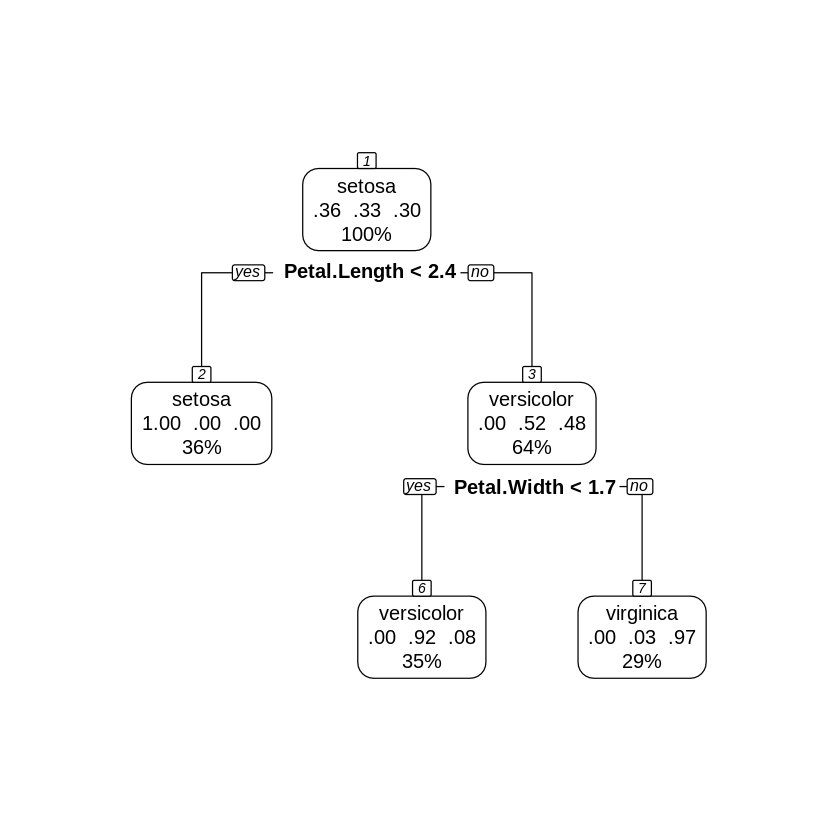

In [ ]:
prp(iris.tree, type=2, extra="auto", nn=TRUE, branch=1, varlen=0, yesno=2)

In [ ]:
y_pred=predict(iris.tree, testData, type="class")

In [ ]:
result=table(y_pred, testData$Species)
result

            
y_pred       setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         14         1
  virginica       0          1        17

In [ ]:
acc=sum(diag(result))/sum(result)
acc

[1] 0.9555556

In [ ]:
new_cases=iris[c(1,10,100,140),]

In [ ]:
new_cases$Species=NULL
print(new_cases)

    Sepal.Length Sepal.Width Petal.Length Petal.Width
1            5.1         3.5          1.4         0.2
10           4.9         3.1          1.5         0.1
100          5.7         2.8          4.1         1.3
140          6.9         3.1          5.4         2.1


In [ ]:
print("New predictions:")
pred_new=predict(iris.tree, new_cases, type="class")
print(pred_new)

[1] "New predictions:"
         1         10        100        140 
    setosa     setosa versicolor  virginica 
Levels: setosa versicolor virginica


In [ ]:
tree.gre=rpart(Petal.Length~Petal.Width,data=trainingData)
tree.gre

n= 105 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 105 329.5819000 3.619048  
   2) Petal.Width< 0.8 38   0.7147368 1.447368 *
   3) Petal.Width>=0.8 67  48.0074600 4.850746  
     6) Petal.Width< 1.55 33  10.2024200 4.215152  
      12) Petal.Width< 1.35 20   3.3400000 3.900000 *
      13) Petal.Width>=1.35 13   1.8200000 4.700000 *
     7) Petal.Width>=1.55 34  11.5344100 5.467647 *

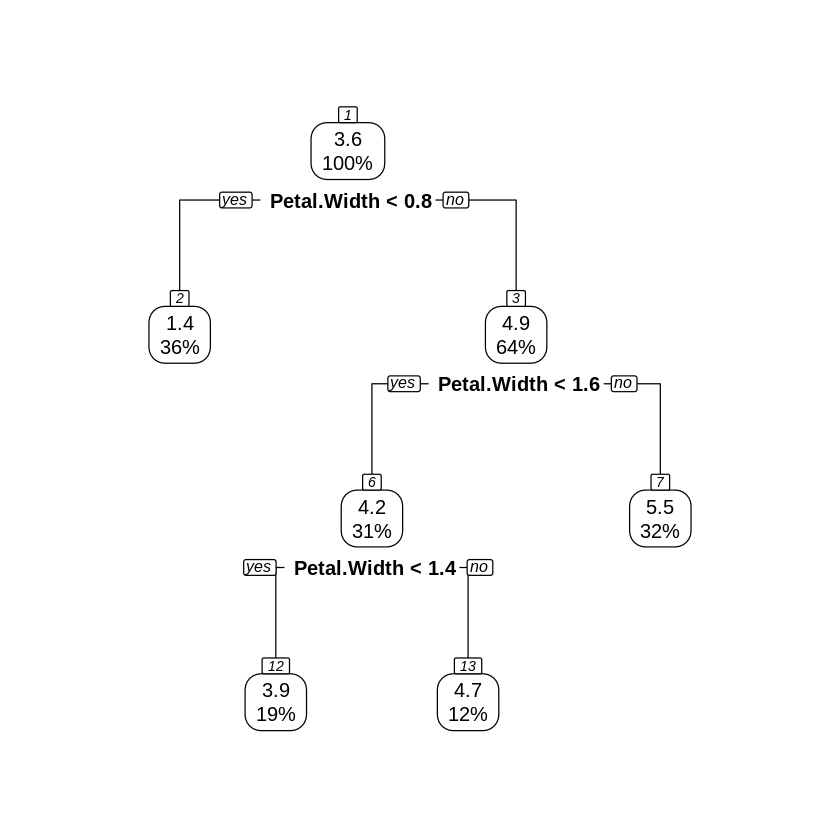

In [ ]:
prp(tree.gre, type=2, extra="auto", nn=TRUE, branch=1, varlen=0, yesno=2)

In [ ]:
install.packages("rattle")
install.packages("RColorBrewer")
library("rattle")
library("RColorBrewer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



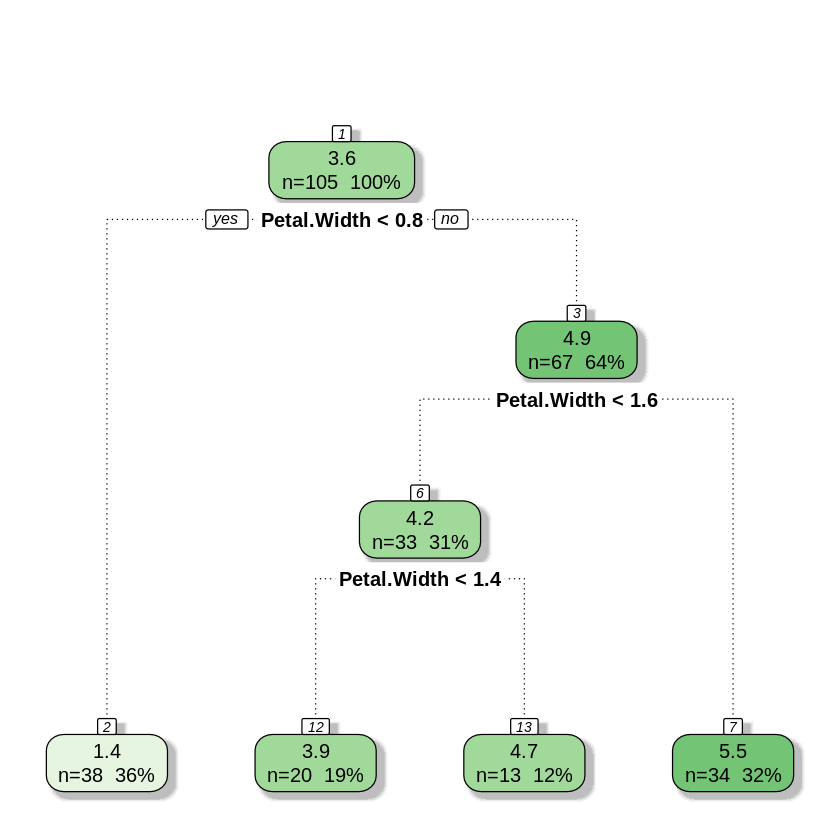

In [ ]:
fancyRpartPlot(tree.gre, caption=NULL)

In [ ]:
now=data.frame(Petal.Width=c(0.25,1.25,2.25))
predict_new=predict(tree.gre,now)
predict_new

1        2        3 
1.447368 3.900000 5.467647

In [47]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’, ‘FactoMineR’, ‘ggpubr’


Warning message in install.packages("factoextra"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘rstatix’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘FactoMineR’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘ggpubr’ had non-zero exit status”
Warning message in install.packa

In [20]:
install.packages("cluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [49]:
library('factoextra')
library(cluster)

ERROR: ignored

In [26]:
res=get_clust_tendency(iris[,3:4], n=nrow(iris[,3:4])-1, graph=TRUE)
res$hopkins_stat

ERROR: ignored

In [3]:
wss=(nrow(iris)-1)*sum(apply(iris[,3:4],2,var))

In [4]:
print(wss)

[1] 550.8953


In [7]:
for (i in 1:6) wss[i]=sum(kmeans(iris[,3:4],centers=i,nstart=20)$withinss)

In [8]:
print(wss)

[1] 550.89533  86.39022  31.37136  19.46599  13.91691  11.02515


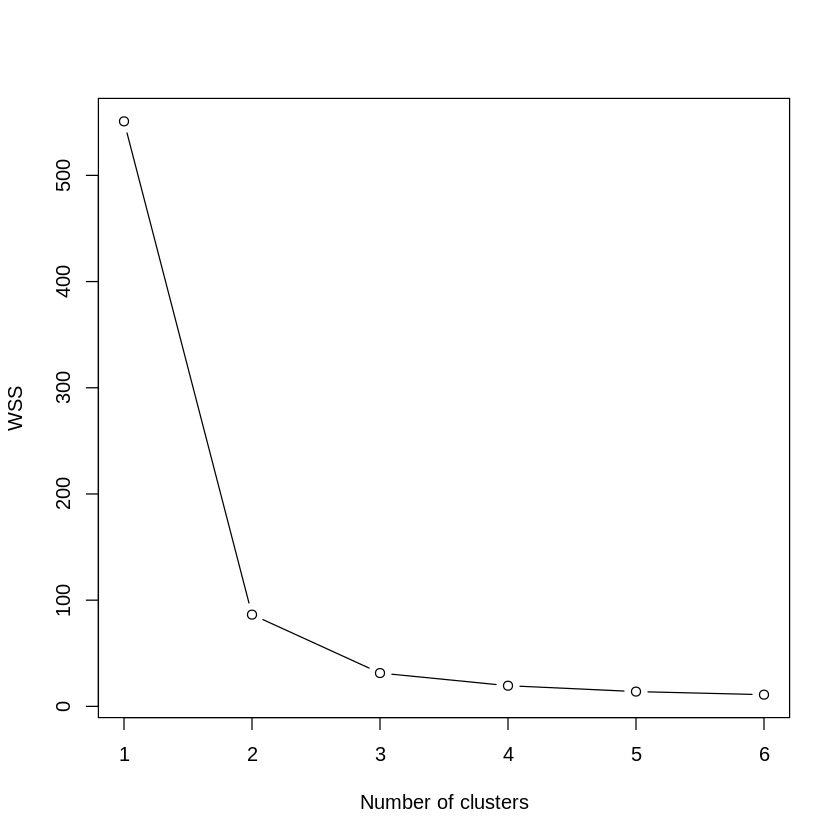

In [9]:
plot(1:6, wss, type="b", xlab="Number of clusters", ylab="WSS")

In [12]:
set.seed(20)

In [14]:
irisCluster=kmeans(iris[,3:4], centers=3, nstart=20)

In [15]:
print(irisCluster)

K-means clustering with 3 clusters of sizes 52, 48, 50

Cluster means:
  Petal.Length Petal.Width
1     4.269231    1.342308
2     5.595833    2.037500
3     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
[112] 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
[149] 2 2

Within cluster sum of squares by cluster:
[1] 13.05769 16.29167  2.02200
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [22]:
print(irisCluster$centers)

  Petal.Length Petal.Width
1     4.269231    1.342308
2     5.595833    2.037500
3     1.462000    0.246000


In [23]:
compare=table(irisCluster$cluster, iris$Species)
print(compare)

   
    setosa versicolor virginica
  1      0         48         4
  2      0          2        46
  3     50          0         0


In [41]:
install.packages("ggplot2")
library("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [42]:
library("factoextra")

ERROR: ignored

In [40]:
fviz_cluster(irisCluster, geom="point", data=iris[, 3:4], stand=F + ggtitle("k=3"))

ERROR: ignored

In [28]:
# make new prediction
newdata = data.frame(Petal.Length = c(1.45, 3.45, 5.25),  
                      Petal.Width = c(0.25, 1.45, 2.35))
newdata


Petal.Length,Petal.Width
<dbl>,<dbl>
1.45,0.25
3.45,1.45
5.25,2.35


In [29]:
# Solution 1
predict.kmeans <- function(object, newdata){
    centers <- object$centers
    n_centers <- nrow(centers)
    dist_mat <- as.matrix(dist(rbind(centers, newdata)))
    dist_mat <- dist_mat[-seq(n_centers), seq(n_centers)]
    max.col(-dist_mat)
}

In [31]:
result=predict.kmeans(irisCluster,newdata)
result

[1] 3 1 2

In [30]:
install.packages("clue")
library("clue")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [33]:
cl_predict(irisCluster, newdata=newdata)

Class ids:
[1] 3 1 2

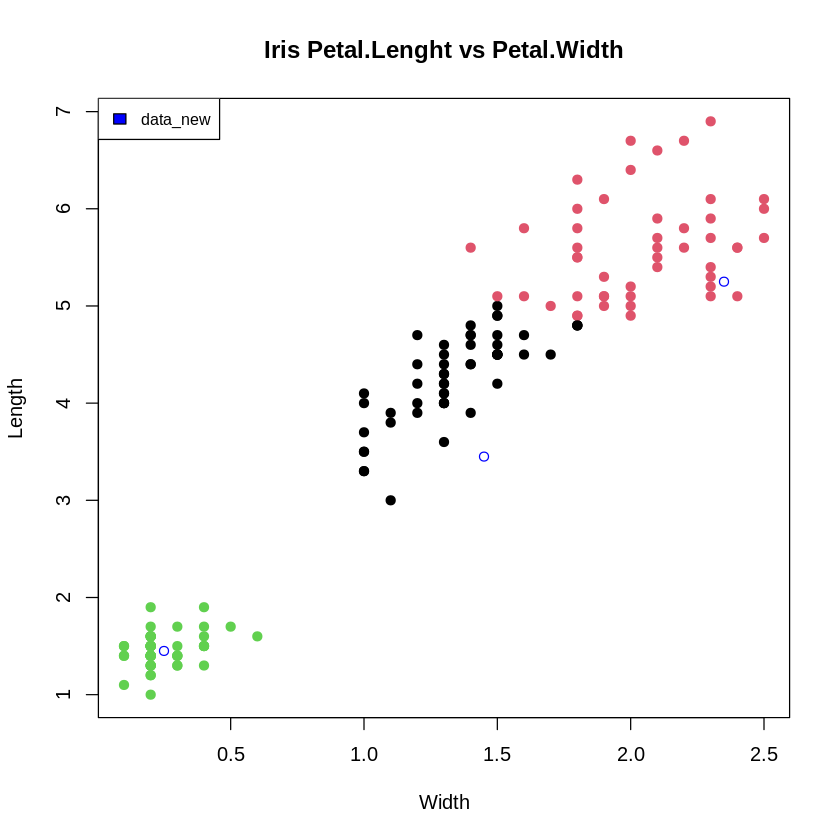

In [39]:
irisCluster$cluster <- as.factor(irisCluster$cluster)
plot(x = iris$Petal.Width,y = iris$Petal.Length,
     xlab = "Width",
     ylab = "Length",
     main = "Iris Petal.Lenght vs Petal.Width", col = irisCluster$cluster,
     pch = 19
)
lines(newdata$Petal.Width, newdata$Petal.Length, col='blue', type='p')
legend("topleft", c("data_new"), cex=0.8, fill = c("blue"))
